# Usage of functions

In this tutorial we compile examples on how to use the differnt functions available in the package. You can refer to previous tutorial to see how to use CellBender and perform quality control and basic downstream analysis of sc/snRNA-seq. We are going to use the object generated in the `Quality control of sc/snRNA-seq`.

## Environment setup

In [1]:
# Set-up
import anndata as ad
import dotools_py as do
import session_info


adata = ad.read_h5ad("/Users/david/Downloads/Data10x/adata.h5ad")
adata

2025-10-22 17:13:17,278 - Jupyter enviroment detected. Using "inline" backend


AnnData object with n_obs × n_vars = 2783 × 18517
    obs: 'batch', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'doublet_class', 'doublet_score', 'leiden', 'autoAnnot', 'celltypist_conf_score', 'annotation', 'annotation_recluster'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'annotation_recluster_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_CCA', 'X_pca', 'X_umap'
    layers: 'counts', 'logcounts'
    obsp: 'connectivities', 'distances'

## Dotplot

The dotplot function builds on scanpy Dotplot method, but we also allow for the visualisation of 3 variables at the same time. For example, we can visualise the expression of a gene across celltypes and conditions

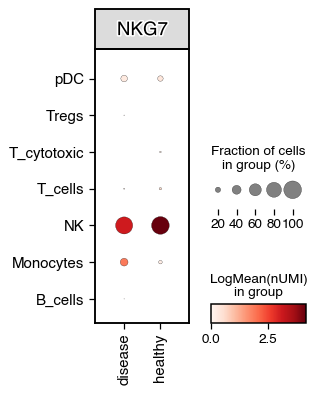

In [2]:
do.pl.dotplot(adata, x_axis="condition", features="NKG7", y_axis="annotation_recluster", figsize=(3, 4))

We can also perform differential testing between groups.

2025-10-22 16:45:41,616 - Error while testing: division by zero


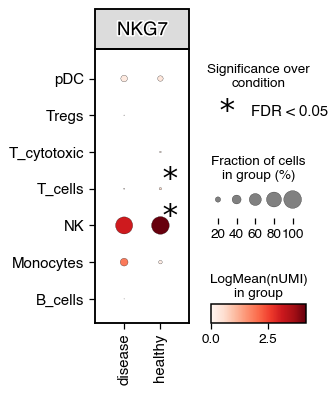

In [4]:
do.pl.dotplot(adata, x_axis="condition", features="NKG7", y_axis="annotation_recluster", figsize=(3, 4), add_stats="x_axis")

## Heatmap
The heatmap functions allow for the visualisation of the mean expression of genes across different groups. We can also test for significance and identify the group with the highest expression compared to the rest

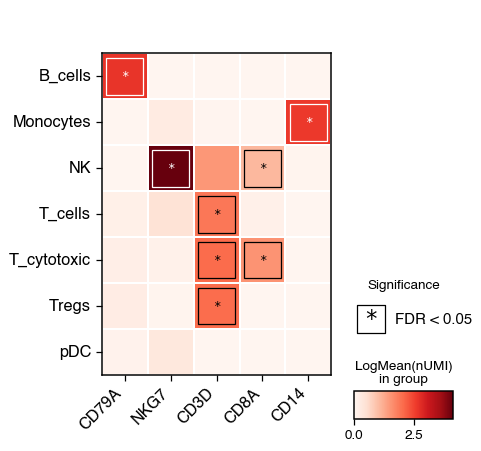

In [5]:
do.pl.heatmap(
    adata,
    group_by="annotation_recluster",
    features=["CD79A", "NKG7", "CD3D", "CD8A", "CD14"],
    add_stats=True,
    xticks_rotation=45,
)

## UMAP
With `do.pl.umap()` we can visualise in UMAP embeddings the expression of genes as well as metadata information

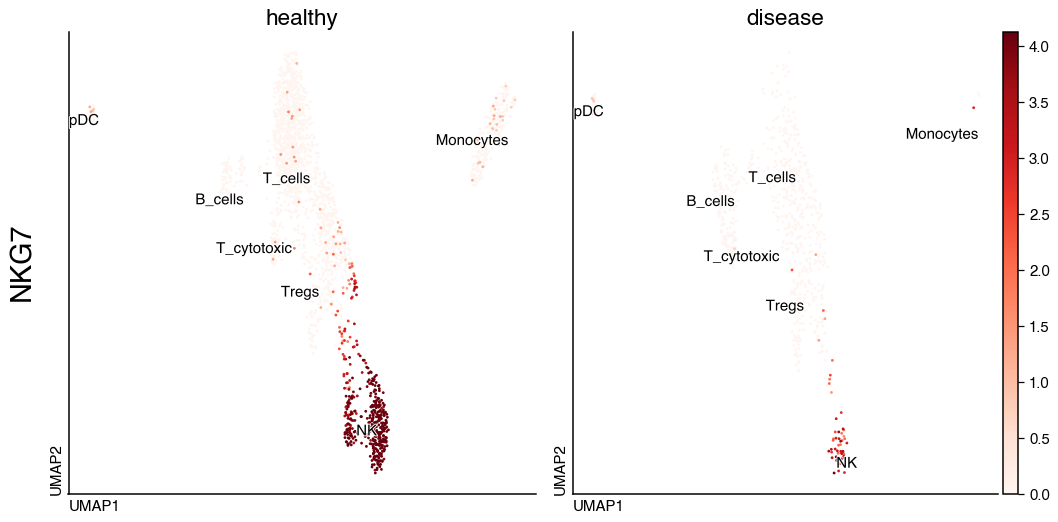

In [8]:
do.pl.umap(adata, "NKG7", split_by="condition", share_legend=True, size=20, labels="annotation_recluster", figsize=(12, 6))

## Split embeddings

If we have categorical metadata we can visualise it also highlighting the different categories in each subplot

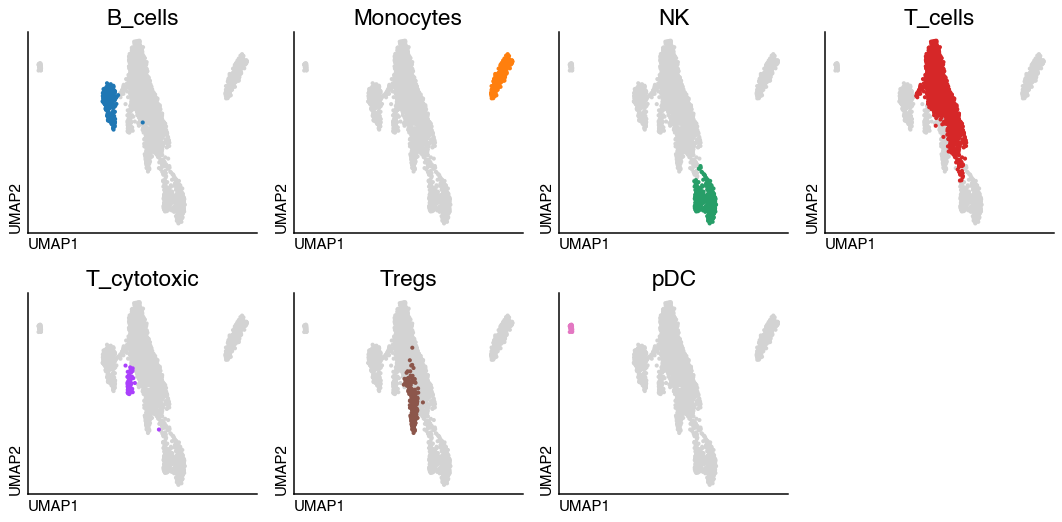

In [9]:
do.pl.split_embeddding(adata, split_by="annotation_recluster", ncols=4, figsize=(12, 6))

## Changes in cell proportion

As shown in the tutorial, we can also test for significant changes in cell population.

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 3 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 1.09 seconds
2025-10-22 16:46:36,057 - There are 5 populations with a significant change


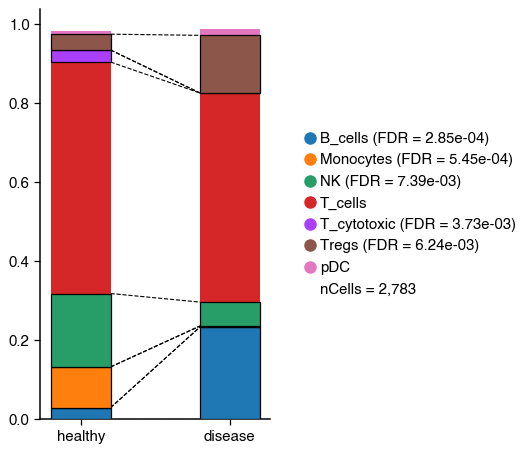

In [10]:
do.pl.cell_composition(
    adata, "annotation_recluster", "condition", "batch", condition_order=["healthy", "disease"], transform="arcsin"
)

## Expression of genes and continuous metadata

We can visualise the average expression of a gene in a celltype or continuous metadata information across condition with barplots, violinplots and boxplots. Additionally, we can test for significance.

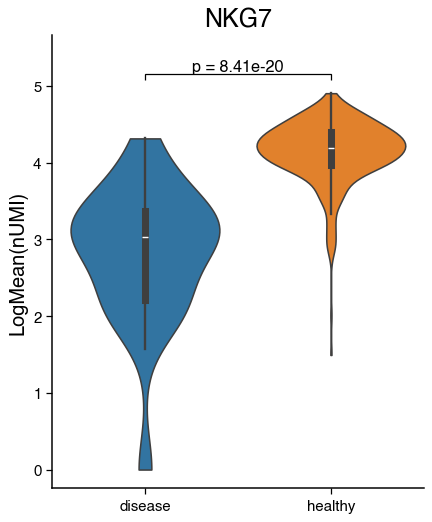

In [11]:
nk = adata[adata.obs.annotation == "NK"]
do.pl.violinplot(nk, feature="NKG7", x_axis="condition", ctrl_cond="healthy", groups_cond="disease", figsize=(5, 6))

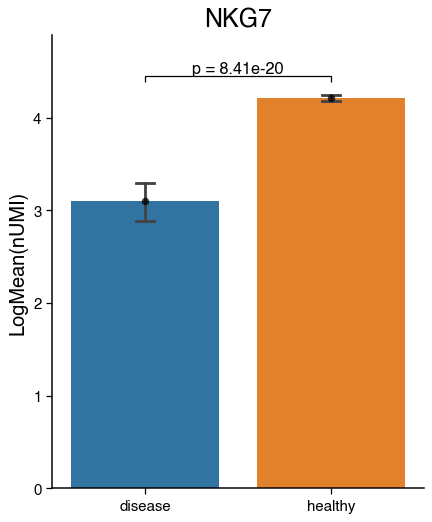

In [12]:
do.pl.barplot(nk, feature="NKG7", x_axis="condition", ctrl_cond="healthy", groups_cond="disease", figsize=(5, 6))

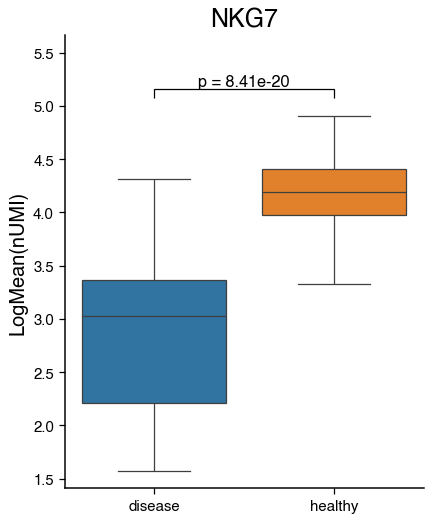

In [13]:
do.pl.boxplot(nk, feature="NKG7", x_axis="condition", ctrl_cond="healthy", groups_cond="disease", figsize=(5, 6))

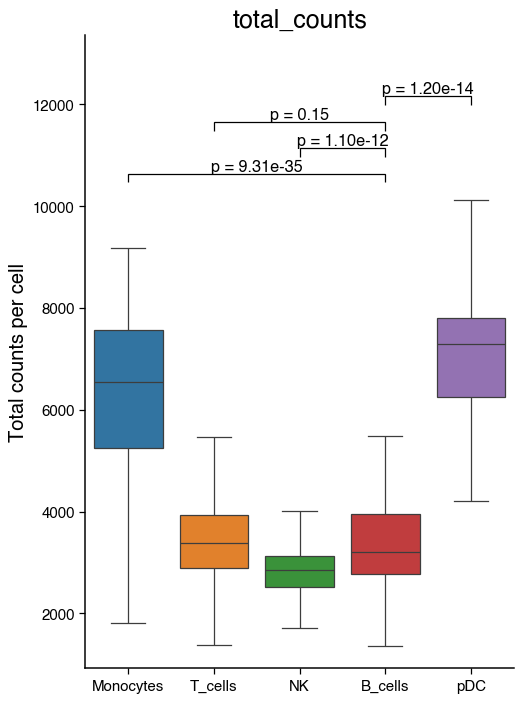

In [2]:
do.pl.boxplot(
    adata,
    "annotation",
    "total_counts",
    ctrl_cond="B_cells",
    groups_cond=["Monocytes", "NK", "T_cells", "pDC"],
    figsize=(6, 8),
    ylabel="Total counts per cell",
)


{'mainplot_ax': <Axes: title={'center': 'NKG7'}, ylabel='LogMean(nUMI)'>,
 'legend_ax': <Axes: >}

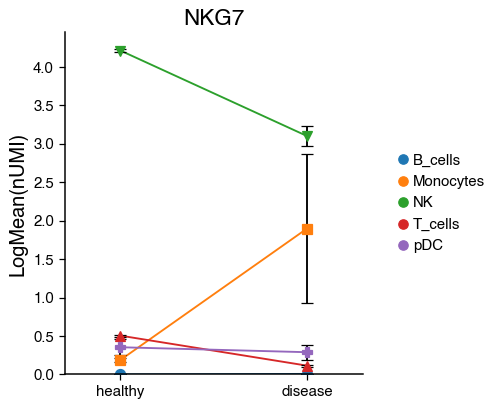

In [4]:
do.pl.lineplot(adata,
               x_axis="condition",
               features="NKG7",
               hue="annotation",
               x_categories_order=["healthy", "disease"],
               )

## Correlation between condition

We can also visualise the overall correlation between categorical metadata such as sample or condition.

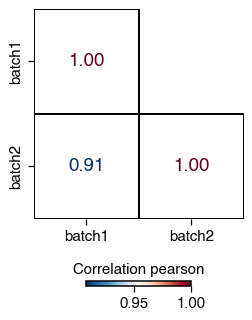

In [3]:
do.pl.correlation(
    adata,
    group_by="batch",
    method="pearson",
    mask="upper",  # Hide the upper triangle
    mode="letters",  # alternative use colors
)

In [2]:
session_info.show(na=False, cpu=True, excludes=["backports"], std_lib=True, dependencies=True, html=True)